In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
# 폰트설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [36]:
font_family = get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [37]:
# 그래프 스타일 설정
# print(plt.style.avaiable)
# https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
path_dir = '/content/gdrive/MyDrive/Data Analysis/dacon/jeonbok/data'

In [40]:
file_list = os.listdir(path_dir)
file_list

['sample_submission.csv', 'train.csv', 'test.csv']

In [41]:
train = pd.read_csv(path_dir + '/train.csv')
train.shape

(1253, 10)

In [42]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


성별, 길이, 둘레, 키, 무게, 껍질을 제외한 무게, 내장 무게, 껍질 무게, 전복 나이 등의 정보가 있다.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


결측치가 없는 것으로 보인다

In [44]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [45]:
train.describe()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,361.854252,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,314.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,627.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,940.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


### 나이(타겟값)

In [48]:
age = train['Target'].unique()
np.sort(age)  # 오름차순 정렬

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29])

In [49]:
# 연령별 개수 확인
train['Target'].value_counts().sort_index()

3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Target, dtype: int64

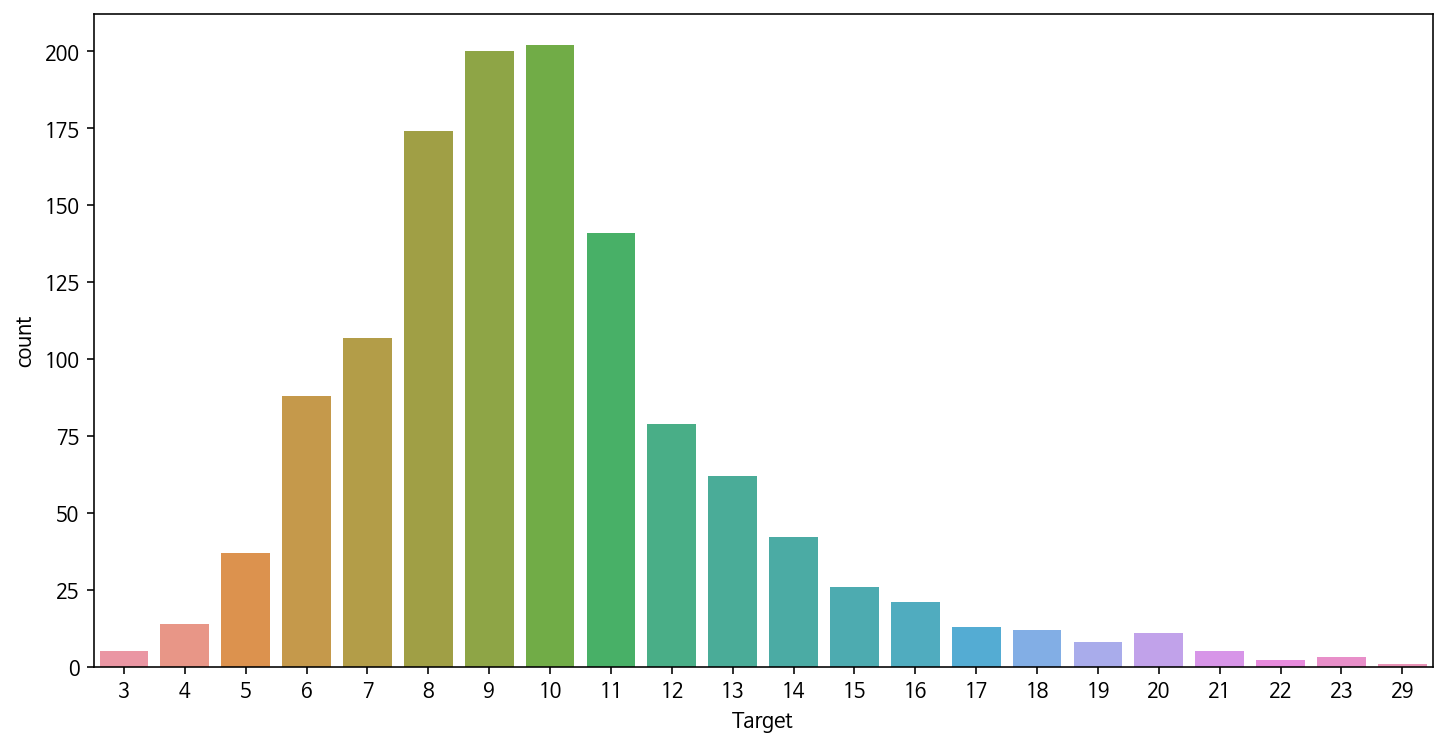

In [50]:
# 시각화
plt.figure(figsize=(12,6))
g = sns.countplot(data=train, x='Target')

10세가 가장 많다. 8~10세가 가장 많은 듯하다.

In [51]:
train[train['Target'] == 3]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,21,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,211,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,286,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,464,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,1014,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [55]:
train[train['Target'] == 23]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,554,F,0.45,0.380,0.165,0.8165,0.250,0.1915,0.265,23
1131,1132,F,0.55,0.415,0.135,0.7750,0.302,0.1790,0.260,23
1234,1235,F,0.49,0.385,0.150,0.7865,0.241,0.1400,0.240,23


In [56]:
train[train['Target'] == 29]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
762,763,F,0.7,0.585,0.185,1.8075,0.7055,0.3215,0.475,29


가장 어린 전복과 나이가 많은 전복의 수치 차이가 있음을 알 수 있다.

### 성별

In [46]:
train['Gender'].value_counts()

M    469
I    404
F    380
Name: Gender, dtype: int64

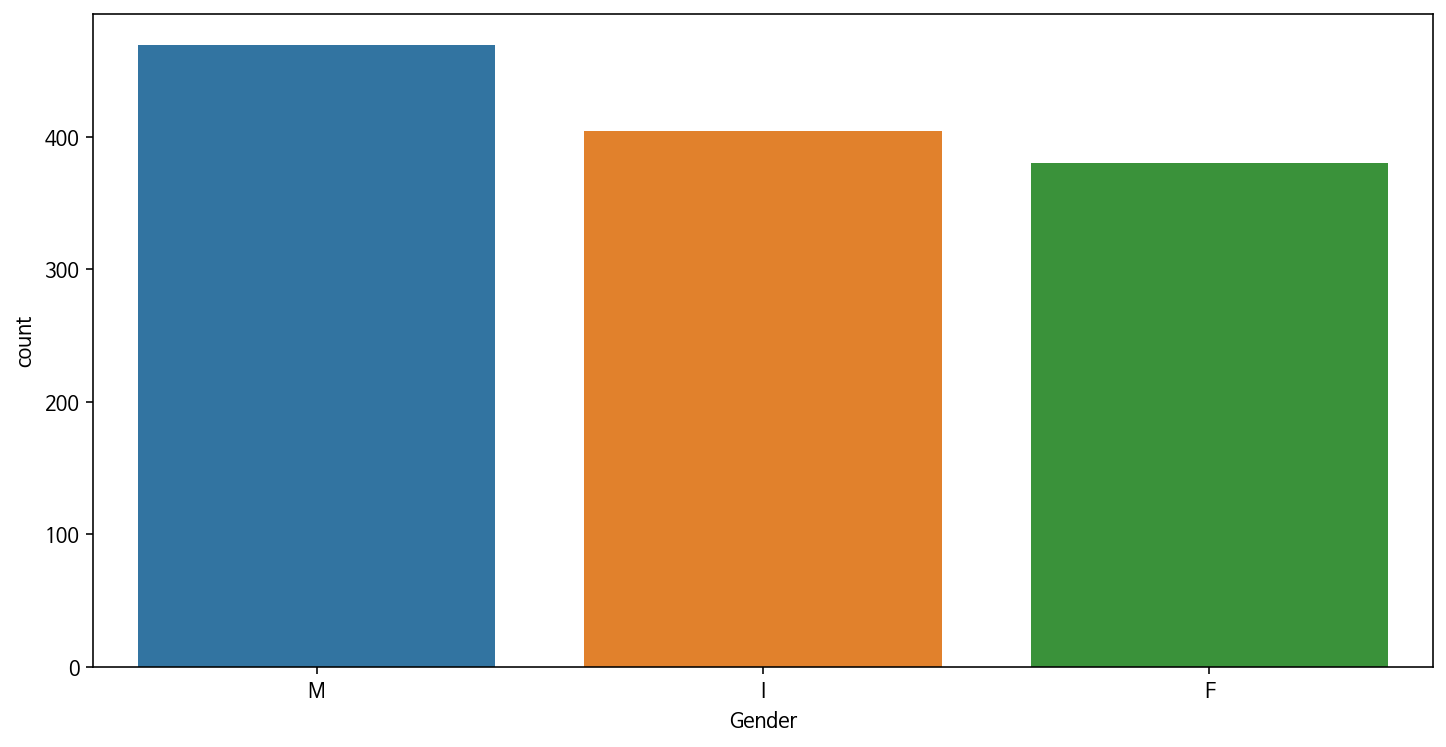

In [57]:
plt.figure(figsize=(12,6))
g = sns.countplot(data=train, x='Gender')

M 성별이 가장 많고 F 성별이 가장 적은 것을 알 수 있다.

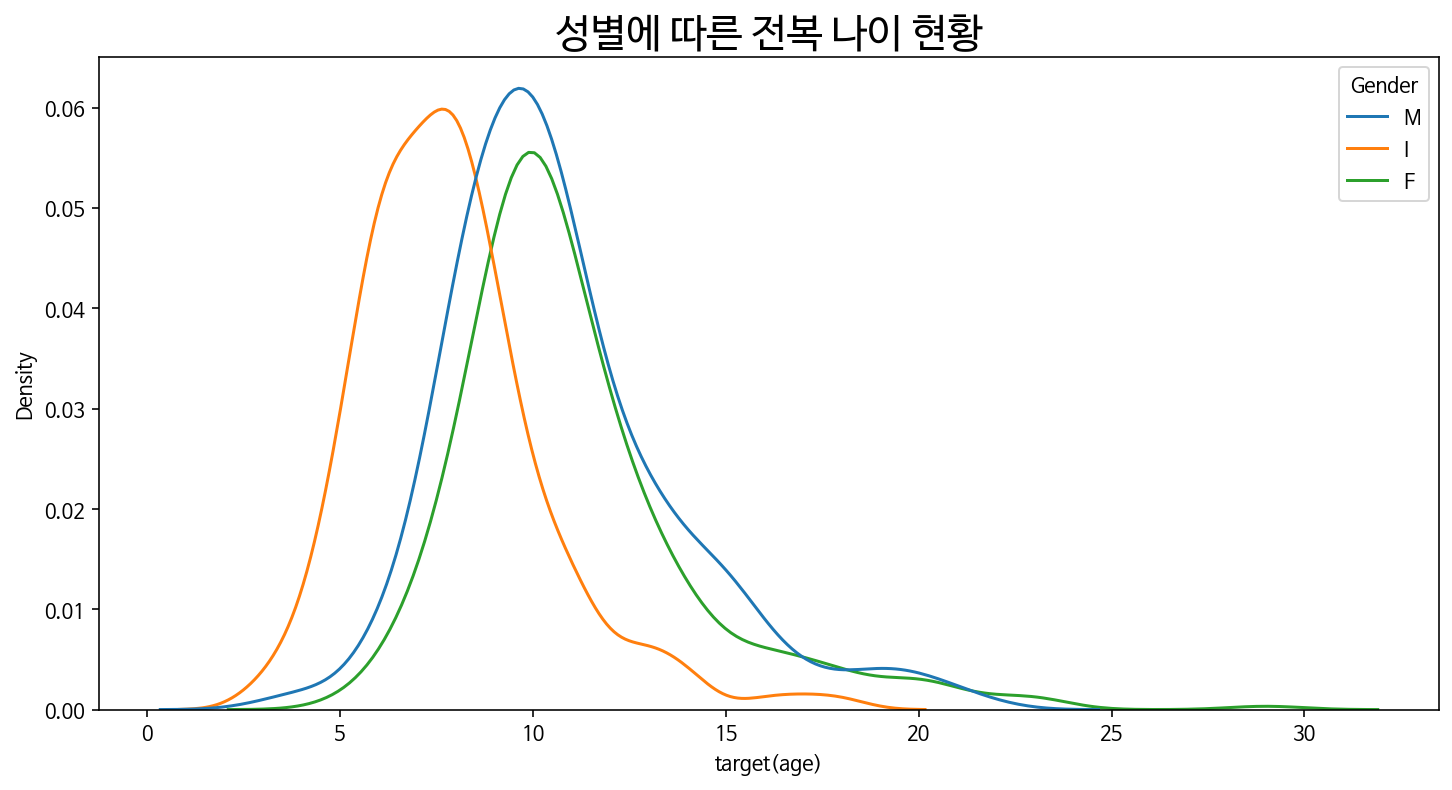

In [59]:
plt.figure(figsize=(12,6))
g = sns.kdeplot(data=df, x='Target', hue='Gender')
plt.title('성별에 따른 전복 나이 현황', fontsize=20)
plt.xlabel('target(age)')
plt.ylabel('Density')
plt.show()

I 성별의 연령대가 가장 젊다.

### 수치형 데이터 시각화

In [68]:
data_description = train.describe()
data_description

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,361.854252,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,314.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,627.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,940.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [65]:
columns = train.columns[2:]
columns

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

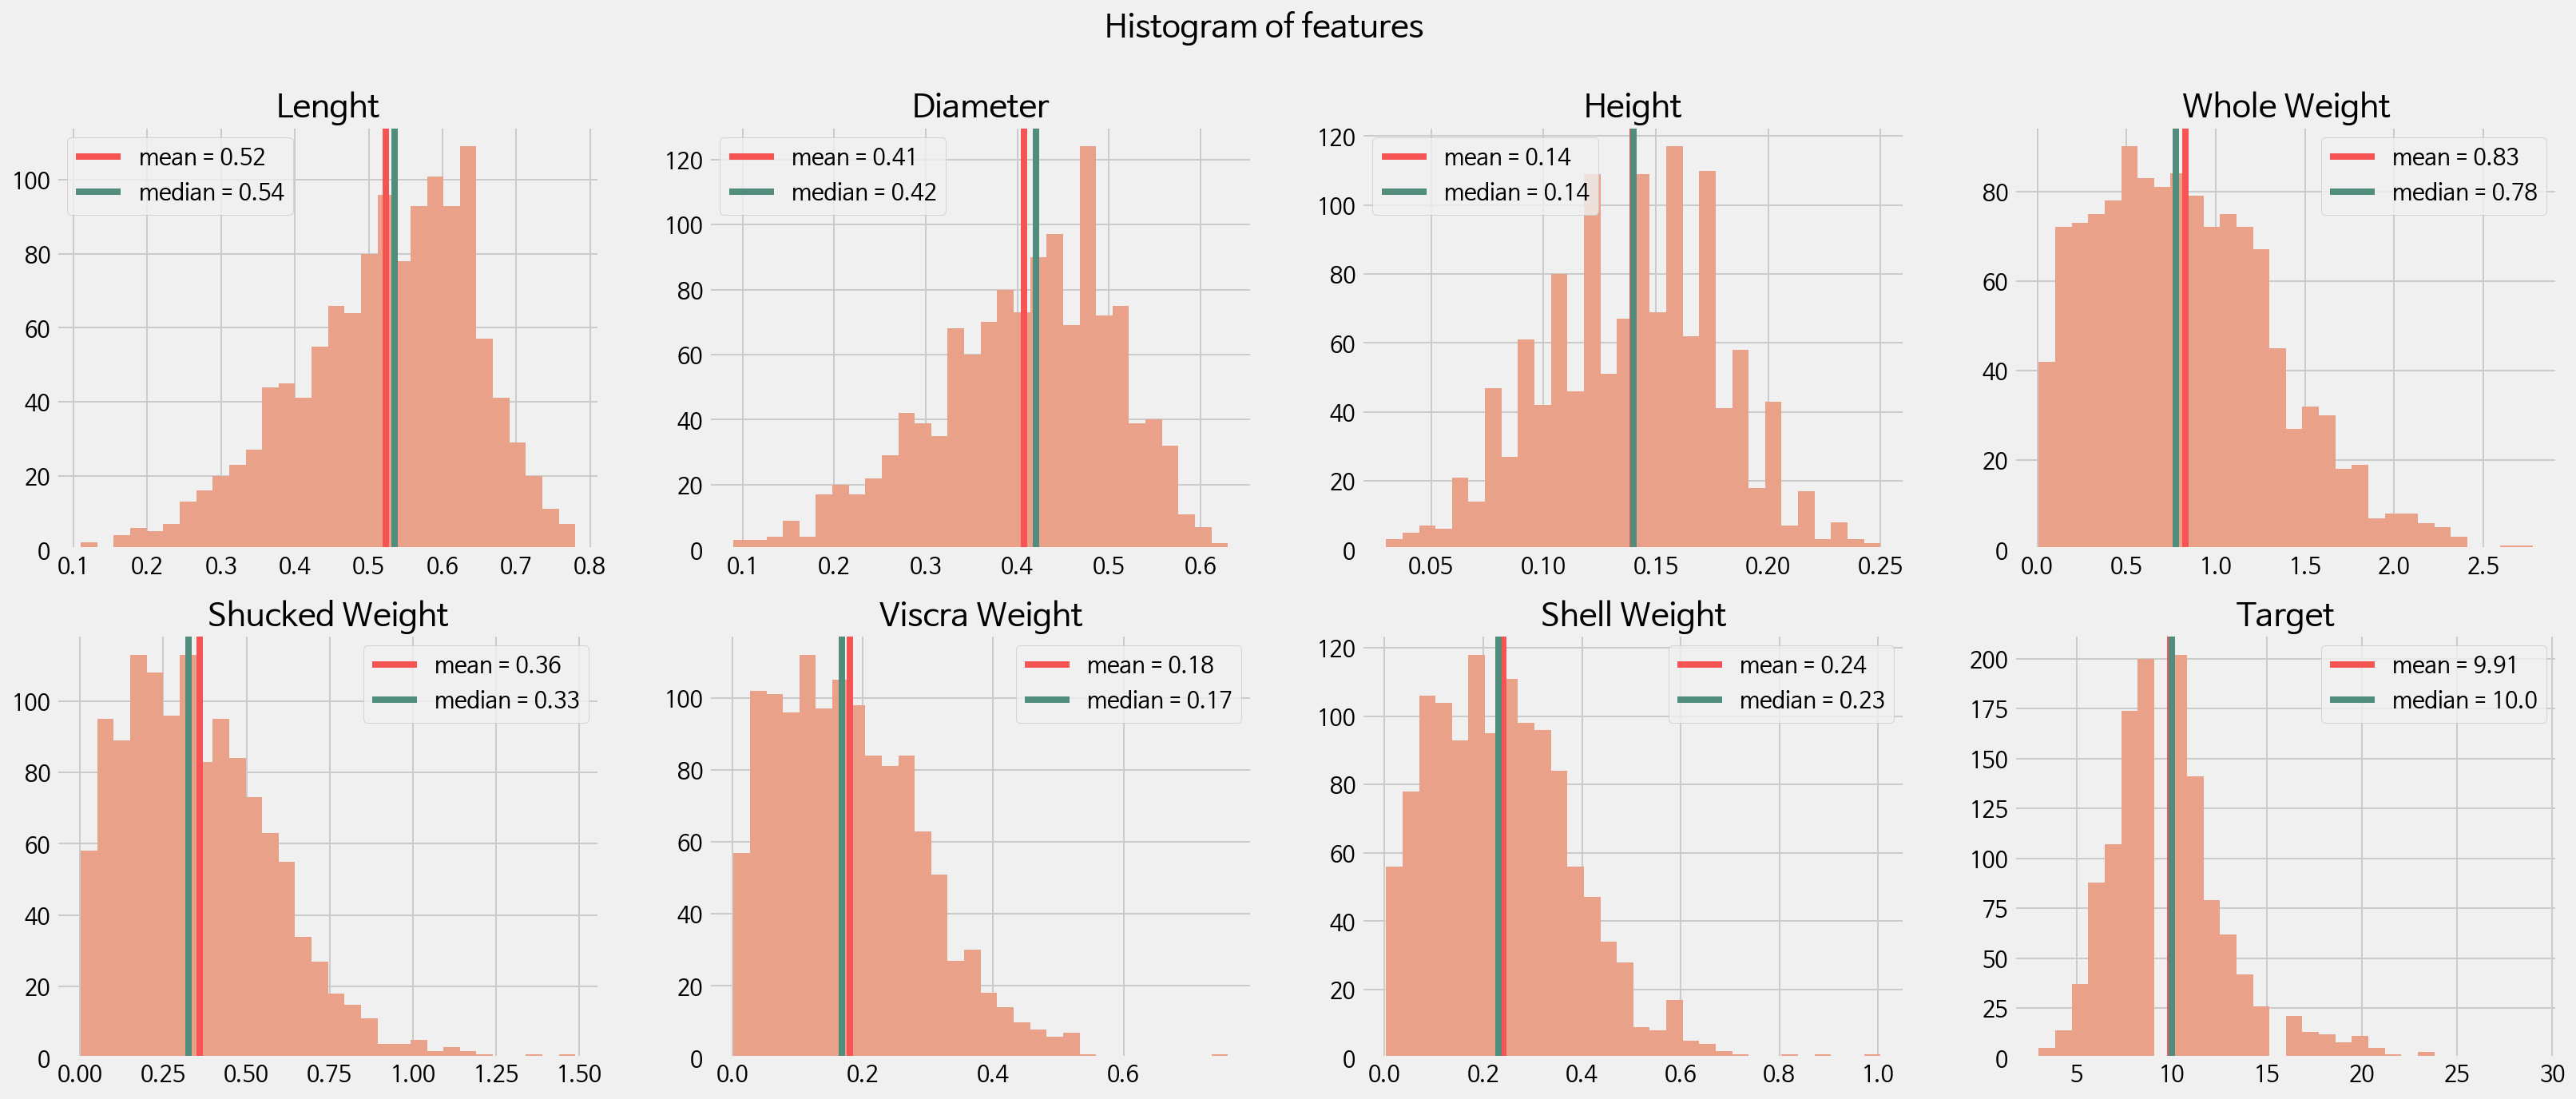

In [73]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2,4, figsize=(25,10))
fig.suptitle('Histogram of features', fontsize=20)
column_idx = 0

for i in range(2):
  for j in range(4):
    ax[i][j].hist(train[columns[column_idx]], bins=30, color='#eaa18a')
    ax[i][j].set_title(columns[column_idx])
    ax[i][j].axvline(data_description[columns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[columns[column_idx]]['mean'],2)}")
    ax[i][j].axvline(data_description[columns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[columns[column_idx]]['50%'],2)}")
    ax[i][j].legend()
    column_idx += 1